### Assignment_2: Unsupervised Data Mining


In [1]:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal

/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


##### The things you should pay attention:

Make sure you fill in any place that says YOUR CODE HERE. Do not write your answer in anywhere else other than where it says YOUR CODE HERE. Anything you write anywhere else will be removed or overwritten by the autograder.

Before you submit your assignment, make sure everything runs as expected. If you have sufficient time, please go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).

Make sure that you save your work (in the menubar, select File → Save and CheckPoint)

Good Luck!

UP

### Problem_1: Dimension Reduction

With Problem_1, we aim to have a better understanding of dimension reduction with PCA. We will use Delta Airline data. Delta and other major airlines have data on all of their aircrafts on their website. [e.g.](https://www.delta.com/content/www/en_US/traveling-with-us/airports-and-aircraft/Aircraft.html)

We will use delta.csv uploaded on Canvas Module for this assignment.

This data set has 34 columns (including the names of the aircrafts) on 44 aircrafts. It inclues both quantitative measurements such as cruising speed, accommodation and range in miles, as well as categorical data, such as whether a particular aircraft has Wi-Fi or video. These binary are assigned values of either 1 or 0, for yes or no respectively.

In [2]:
import os
os.chdir("/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Assignments/Assignment_2")

In [3]:
df = pd.read_csv('delta.csv', index_col='Aircraft')
#df = df[["Cruising Speed (mph)","Range (miles)","Engines","Wingspan (ft)","Tail Height (ft)","Length (ft)"]]
#df.reset_index(level=0, inplace=True)

In [4]:
Aircraft = pd.read_csv('delta.csv')
Aircraft=Aircraft['Aircraft'].to_list()
Aircraft

['Airbus A319',
 'Airbus A319 VIP',
 'Airbus A320',
 'Airbus A320 32-R',
 'Airbus A330-200',
 'Airbus A330-200 (3L2)',
 'Airbus A330-200 (3L3)',
 'Airbus A330-300',
 'Boeing 717',
 'Boeing 737-700 (73W)',
 'Boeing 737-800 (738)',
 'Boeing 737-800 (73H)',
 'Boeing 737-900ER (739)',
 'Boeing 747-400 (74S)',
 'Boeing 757-200 (75A)',
 'Boeing 757-200 (75E)',
 'Boeing 757-200 (75M)',
 'Boeing 757-200 (75N)',
 'Boeing 757-200 (757)',
 'Boeing 757-200 (75V)',
 'Boeing 757-200 (75X)',
 'Boeing 757-300',
 'Boeing 767-300 (76G)',
 'Boeing 767-300 (76L)',
 'Boeing 767-300 (76P)',
 'Boeing 767-300 (76Q)',
 'Boeing 767-300 (76T)',
 'Boeing 767-300 (76U)',
 'Boeing 767-300 (76Z V.1)',
 'Boeing 767-300 (76Z V.2)',
 'Boeing 767-400 (76D)',
 'Boeing 777-200ER',
 'Boeing 777-200LR',
 'CRJ 100/200 Pinnacle/SkyWest',
 'CRJ 100/200 ExpressJet',
 'CRJ 700',
 'CRJ 900',
 'E120',
 'E170',
 'E175',
 'ERJ-145',
 'MD-88',
 'MD-90',
 'MD-DC9-50']

In [5]:
df.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
Aircraft,,,,,,,,,,,,,,,,,,,,,
Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,1,0,0,0,0,1,1,1,0,0
Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,1,1,0,1,0,0,0,1,1,1


First, let's look at the attributes related to the aircraft physical characteristics:

Cruising Speed (mph)
Range (miles)
Engines
Wingspan (ft)
Tail Height (ft)
Length (ft)
These six variables are about in the middle of the data frame (and it's part of your task to figure out where they are located).

Write a function named plot_pairgrid() that takes a pandas.DataFrame and uses seaborn.PairGrid to visualize the attributes related to the six physical characteristics listed above. The plots on the diagonal should be histograms of corresponding attributes, and the off-diagonal should be scatter plots.

In [6]:

def plot_pairgrid(df):
    '''
    Uses seaborn.PairGrid to visualize the attributes related to the six physical characteristics.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from importing delta.csv.
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    # YOUR CODE HERE
    
    df=df[["Cruising Speed (mph)","Range (miles)","Engines","Wingspan (ft)","Tail Height (ft)","Length (ft)"]]
    
    sns.set(style="white")


    g = sns.PairGrid(df)
    g = g.map_offdiag(plt.scatter)
    ax = g.map_diag(plt.hist)
        
    return ax


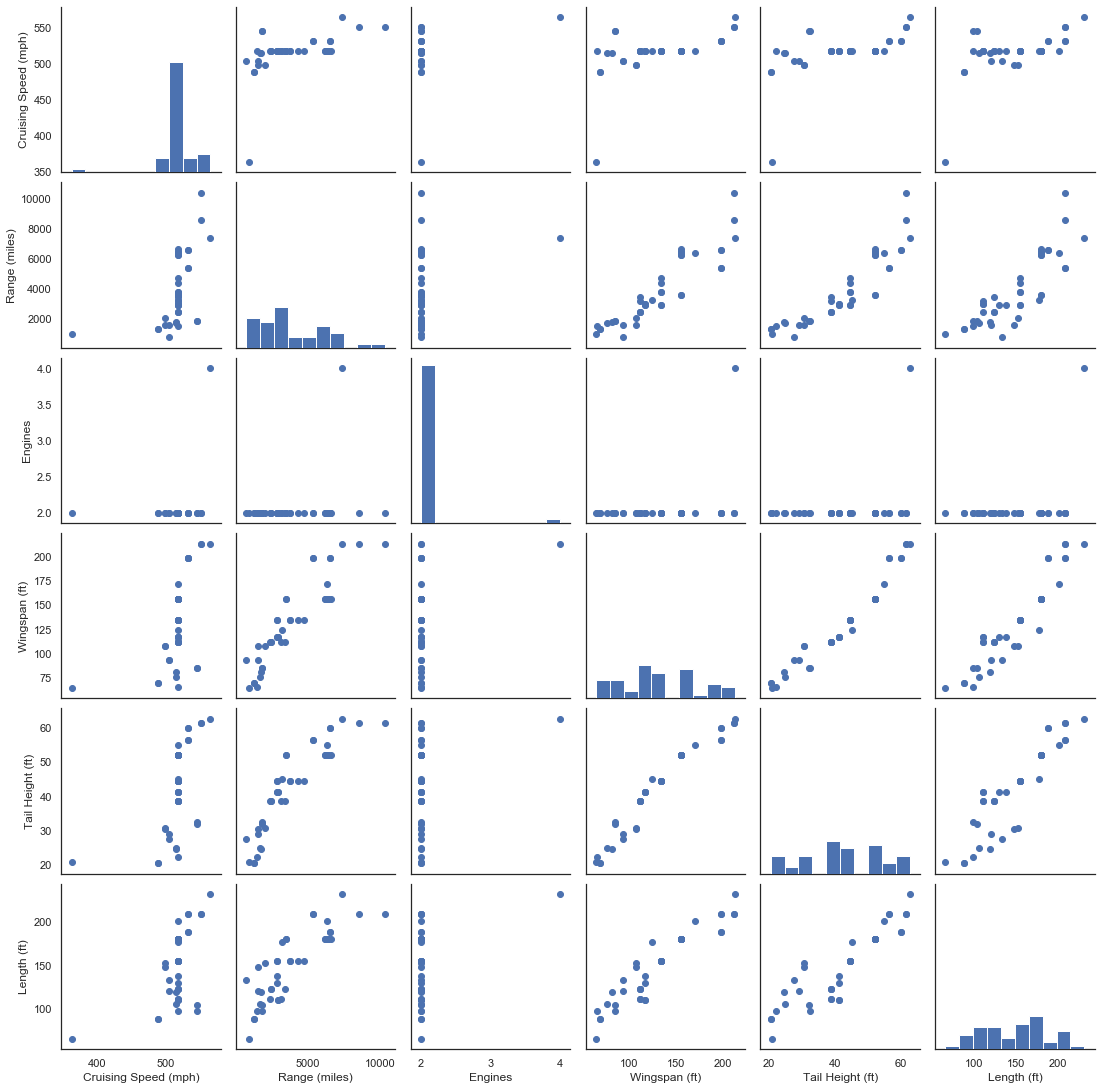

In [7]:
pg = plot_pairgrid(df) #your answer should look like this

We observe that pretty strong positive correlations between all these variables, as most of them are related to the aircraft’s overall size. Remarkably there is an almost perfectly linear relationship between wingspan and tail height.

The exception here is engines. There is one outlier which has four engines, while all the other aircraft have two. In this way the engines variable is really more like a categorical variable, but we shall as the analysis progresses that this is not really important, as there are other variables which more strongly discern the aircraft from one another than this.

In [8]:
### This is the unittest cell, please just run this cell without any modification once you generated "pg" above

cols = ['Cruising Speed (mph)', 'Range (miles)', 'Engines',
        'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']

assert_is_instance(pg.fig, plt.Figure)
assert_equal(set(pg.data.columns), set(cols))

for ax in pg.diag_axes:
    assert_equal(len(ax.patches), 10)

for i, j in zip(*np.triu_indices_from(pg.axes, 1)):
    ax = pg.axes[i, j]
    x_in = df[cols[j]]
    y_in = df[cols[i]]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.tril_indices_from(pg.axes, -1)):
    ax = pg.axes[i, j]
    x_in = df[cols[j]]
    y_in = df[cols[i]]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.diag_indices_from(pg.axes)):
    ax = pg.axes[i, j]
    assert_equal(len(ax.collections), 0)

#### Apply PCA
I assume we dont know anything about dimensionality reduction techniques and just naively apply principle components to the data.

Write a function named fit_pca() that takes a pandas.DataFrame and uses [sklearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to fit a PCA model on all values of df.

In [9]:
 def fit_pca(df, n_components):
    '''
    Uses sklearn.decomposition.PCA to fit a PCA model on "df".
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from delta.csv.
    n_components: An int. Number of principal components to keep.
    
    Returns
    -------
    An sklearn.decomposition.pca.PCA instance.
    '''
    
    # YOUR CODE HERE
    
    pca=PCA(n_components=n_components).fit(df)
    
    return pca

In [10]:
# we keep all components by setting n_components = no of cols in df. FYI df.shape[0] returns # of rows, len(df.columns) also works similar
pca_naive = fit_pca(df, n_components=df.shape[1])

In [11]:
assert_is_instance(pca_naive, PCA)
assert_almost_equal(pca_naive.explained_variance_ratio_.sum(), 1.0, 3)
assert_equal(pca_naive.n_components_, df.shape[1])
assert_equal(pca_naive.whiten, False)

In [12]:

def plot_naive_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Attributes are not scaled, hence a naive approach.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)

    return ax

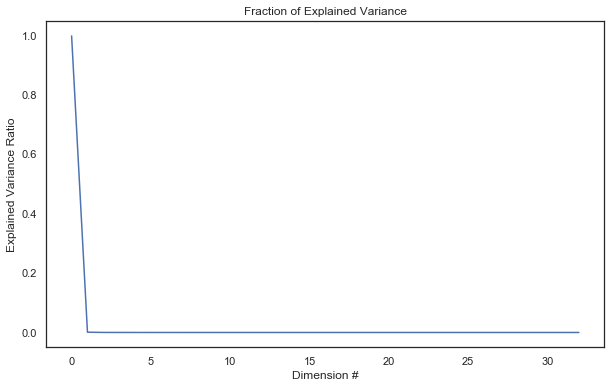

In [13]:
naive_var = plot_naive_variance(pca_naive)

In [14]:
assert_is_instance(naive_var, mpl.axes.Axes)
assert_equal(len(naive_var.lines), 1)

assert_is_not(len(naive_var.title.get_text()), 0,
    msg="Your plot doesn't have a title.")
assert_is_not(naive_var.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive.")
assert_is_not(naive_var.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive.")

xdata, ydata = naive_var.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(df.shape[1])))
assert_array_almost_equal(ydata, pca_naive.explained_variance_ratio_)

In [15]:
abs_val = np.abs(pca_naive.components_[0])
max_pos = abs_val.argmax()
max_val = abs_val.max()

print('"{0}" accounts for {1:0.3f} % of the variance.'.format(df.columns[max_pos], max_val))

"Range (miles)" accounts for 0.999 % of the variance.


Taking this naive approach, we can see that the first principal component accounts for 99.9% of the variance in the data. (Note the y-axis is on a log scale.) Looking more closely, can we see that the first principle component is just the range in miles? This is because the scale of the different variables in the data set is quite variable.

PCA is a scale-dependent method. For example, if the range of one column is [-100, 100], while the that of another column is [-0.1, 0.1], PCA will place more weight on the feature with larger values. One way to avoid this is to standardize a data set by scaling each feature so that the individual features all look like Gausssian distributions with zero mean and unit variance. 

Please write a function named standardize() where StandardScaler function of sklearn will be used to scale each feature so that they have zero mean and unit variance.

In [16]:
def standardize(df):
    '''
    Uses sklearn.preprocessing.StandardScaler to make each features look like
    a Gaussian with zero mean and unit variance.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    
    Returns
    -------
    A numpy array.
    '''
    
    # YOUR CODE HERE
    
    stscaler = StandardScaler().fit(df)
    scaled= stscaler.transform(df)
    
    return scaled

In [17]:
scaled = standardize(df)

In [18]:
rng = np.random.RandomState(0)
n_samples, n_features = 4, 5

df_t1 = pd.DataFrame(
    rng.randn(n_samples, n_features),
    index=[i for i in 'abcd'],
    columns=[c for c  in 'abcde']
    )
df_t1.loc[:, 'a'] = 0.0  # make first feature zero

scaled_t1 = standardize(df_t1)

assert_is_not(df_t1, scaled_t1)
assert_is_instance(scaled_t1, np.ndarray)
assert_array_almost_equal(
    scaled_t1.mean(axis=0),
    n_features * [0.0] # scaled data should have mean zero
    ) 
assert_array_almost_equal(
    scaled_t1.std(axis=0),
    [0., 1., 1., 1., 1.] # unit variance except for 1st feature
    )

In [19]:
# we keep only 10 components
n_components = 10
pca = fit_pca(scaled, n_components=n_components)

Let's take another look to the explained variance of the first 10 principal components from the scaled data.

In [20]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE

    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)

    
    return ax

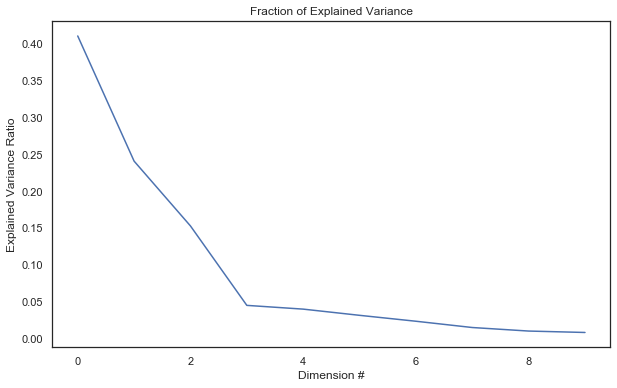

In [21]:
ax = plot_scaled_variance(pca)

In [22]:
assert_is_instance(ax, mpl.axes.Axes)
assert_equal(len(ax.lines), 1)

assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")

xdata, ydata = ax.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(n_components)))
assert_array_almost_equal(ydata, pca.explained_variance_ratio_)

Nice, it looks good to go. There are various rules of thumb for selecting the number of principal components to retain in an analysis of this type, one of which I’ve experienced about is:

Pick the number of components which explain 85% or greater of the variation.
So, we will keep the first 4 principal components (remember that we are counting from zero, so we are keeping 0th, 1st, 2nd, and 3rd components—four components). Later in this assignment, we will use these four components to fit a $k$-means model. Before we move on to the next problem, let's apply the dimensional reduction on the scaled data. (In the previous sections, we didn't actually have to apply  transform(). This step is to make sure that the scaled data is actually "transformed".)

Write a function named reduce() that takes a PCA model (that is already trained on array) and a Numpy array, and applies dimensional reduction on the array.

In [23]:
def reduce(pca, array):
    '''
    Applies the `pca` model on array.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.PCA instance.
    
    Returns
    -------
    A Numpy array
    '''
    
    # YOUR CODE HERE
    
    reduced=pca.fit_transform(array)    

    
    return reduced

In [24]:
reduced = reduce(pca, scaled)

In [25]:
assert_is_instance(reduced, np.ndarray)
assert_array_almost_equal(reduced, pca.fit_transform(scaled))

In [26]:
# Save the reduced data to the same directory of your notebook  as 'delta_reeuced.npy' that we will use later on
np.save('delta_reduced.npy', reduced)

### Problem 2. Clustering

We will use the first 10 principal components of the Delta Airline data set that we created in the first step.


In [27]:
##Standard imports just in case

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn.utils import check_random_state
from sklearn.cluster import KMeans
from sklearn.cluster import k_means_

from nose.tools import assert_equal, assert_is_instance, assert_true, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal

/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
## Reload the the first 10 components of delta dataset
reduced = np.load('delta_reduced.npy')


Write a function named cluster() that fits a k-means clustering algorithm, and returns a tuple (sklearn.cluster.k_means_.KMeans, np.array). The second element of the tuple is a 1-d array that contains the predictions of k-means clustering, i.e. which cluster each data point belongs to. Please remember how we were generating and using the labels for seeds, movements, iris etc.


Use default values for all parameters in KMeans() execept for n_clusters and random_state.

In [29]:
def cluster(array, random_state, n_clusters=4):
    '''
    Fits and predicts k-means clustering on "array"
    
    Parameters
    ----------
    array: A numpy array
    random_state: Random seed, e.g. check_random_state(0)
    n_clusters: The number of clusters. Default: 4
    
    Returns
    -------
    A tuple (sklearn.KMeans, np.ndarray)
    '''
    model = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    model.fit(array)
    clusters= model.predict(array)
      
    
    return model, clusters

#here we return fitted (model) and predicted (clusters) arrays as a tuple

In [30]:
k_means_t, cluster_t = cluster(reduced, random_state=check_random_state(1), n_clusters=5)

assert_is_instance(k_means_t, sklearn.cluster.k_means_.KMeans)
assert_is_instance(cluster_t, np.ndarray)
assert_equal(k_means_t.n_init, 10)
assert_equal(k_means_t.n_clusters, 5)
assert_equal(len(cluster_t), len(reduced))
assert_true((cluster_t < 5).all()) # n_cluster = 5 so labels should be between 0 and 5
assert_true((cluster_t >= 0).all())
labels_gold = -1. * np.ones(len(reduced), dtype=np.int)
mindist = np.empty(len(reduced))
mindist.fill(np.infty)
for i in range(5):
    dist = np.sum((reduced - k_means_t.cluster_centers_[i])**2., axis=1)
    labels_gold[dist < mindist] = i
    mindist = np.minimum(dist, mindist)
assert_true((mindist >= 0.0).all())
assert_true((labels_gold != -1).all())
assert_array_equal(labels_gold, cluster_t)

The scikit-learn documentation on sklearn.cluster.KMeans says that [Kmeans cluster](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) has the inertia value in the inertia_ attribute. So we can vary the number of clusters in KMeans, plot KMeans.inertia_ as a function of the number of clusters, and pick the "elbow" in the plot.

Always use check_random_state(0) to seed the random number generator.


In [31]:
def plot_inertia(array, start=1, end=11):
    '''
    Increase the number of clusters from "start" to "end" (inclusive).
    Finds the inertia of k-means clustering for different k.
    Plots inertia as a function of the number of clusters.

    
    Parameters
    ----------
    array: A numpy array.
    start: An int. Default: 1
    end: An int. Default: 10
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    #Your code is here
    inertia=[]
    x_axis=range(start,11)
    
    for i in list(range(start,11)):
        kmeans = KMeans(n_clusters = i, init = 'k-means++',
                        max_iter = 400, n_init = 10, random_state = check_random_state(0))
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)

    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)
    
    return ax

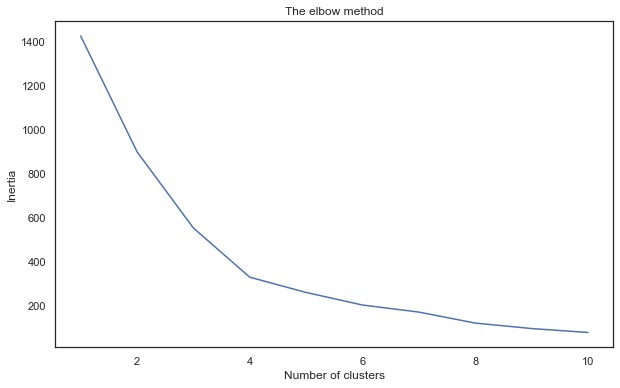

In [32]:
inertia = plot_inertia(reduced)

In [33]:
assert_is_instance(inertia, mpl.axes.Axes)
assert_true(len(inertia.lines) >= 1)

xdata, ydata = inertia.lines[0].get_xydata().T

for i in range(1, 11):
    k_means_t, cluster_t = cluster(reduced, random_state=check_random_state(0), n_clusters=i)
    assert_array_equal(xdata[i - 1], i)
    assert_almost_equal(ydata[i - 1], k_means_t.inertia_)

assert_is_not(len(inertia.title.get_text()), 0,
    msg="Your plot doesn't have a title.")
assert_is_not(inertia.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive.")
assert_is_not(inertia.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive.")

In [34]:
def plot_pair(reduced, clusters):
    '''
    Uses seaborn.PairGrid to visualize the data distribution
    when axes are the first four principal components.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    reduced: A numpy array. Comes from importing delta_reduced.npy
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    df = pd.DataFrame(reduced)
    df['c'] = clusters
    subset = [0,1,2,3, 'c']
    columns = [0,1,2,3]
    
    ax = sns.PairGrid(df[subset], vars = columns, hue = 'c')
    ax = ax.map_diag(plt.hist)
    ax = ax.map_offdiag(plt.scatter)
    
    return ax

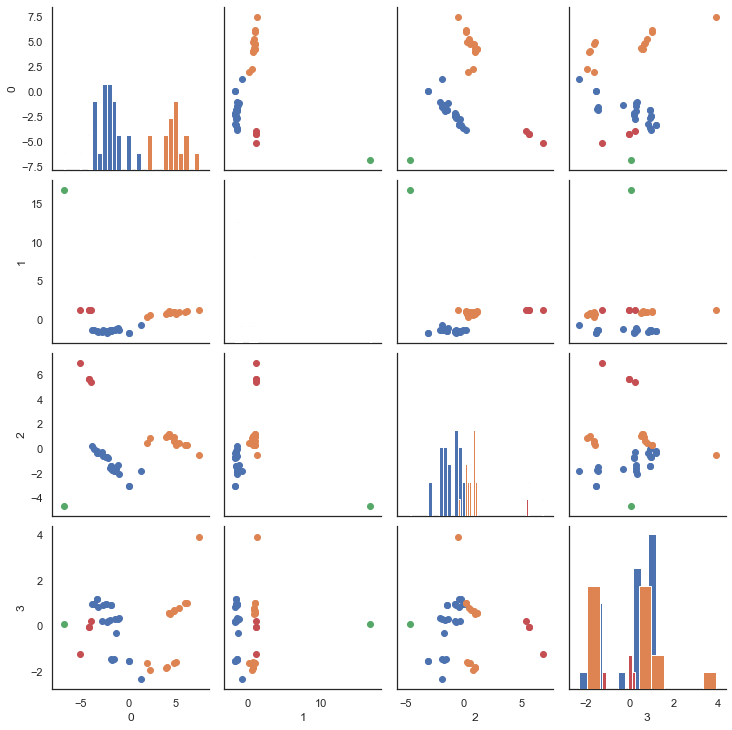

In [35]:
k_means, clusters = cluster(reduced, random_state=check_random_state(0), n_clusters=4)
pg = plot_pair(reduced, clusters)

We observe that the one outlier is in its own cluster, there’s 3 or 4 points in the other clusters and the remainder are split into two clusters of greater size.

In [36]:
assert_is_instance(pg.fig, plt.Figure)
assert_true(len(pg.data.columns) >= 4)

for ax in pg.diag_axes:
    assert_equal(len(ax.patches), 4 * 10) # 4 clusters with 10 patches in each histogram

for i, j in zip(*np.triu_indices_from(pg.axes, 1)):
    ax = pg.axes[i, j]
    x_out, y_out = ax.collections[0].get_offsets().T
    x_in = reduced[clusters == 0, j] # we only check the first cluster
    y_in = reduced[clusters == 0, i]
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.tril_indices_from(pg.axes, -1)):
    ax = pg.axes[i, j]
    x_in = reduced[clusters == 0, j]
    y_in = reduced[clusters == 0, i]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.diag_indices_from(pg.axes)):
    ax = pg.axes[i, j]
    assert_equal(len(ax.collections), 0)

#### Let's Continue our Analysis and brainstorm
You don't have to write any code in this section, but here's one interpretaion of what we have done.

Let's take a closer look at each cluster.

In [37]:

df = pd.read_csv('delta.csv', index_col='Aircraft')
df['Clusters'] = clusters
df['Aircraft'] = df.index
df_grouped = df.groupby('Clusters').mean()
print(df_grouped.Accommodation)

Clusters
0    153.625000
1    244.733333
2     54.000000
3     44.500000
Name: Accommodation, dtype: float64


In [38]:
print(df_grouped['Length (ft)'])

Clusters
0    137.048083
1    190.538400
2    111.000000
3     84.810750
Name: Length (ft), dtype: float64


Cluster 2 has only one aircraft:

In [39]:
clust2 = df[df.Clusters == 2]
print(clust2.Aircraft)

Aircraft
Airbus A319 VIP    Airbus A319 VIP
Name: Aircraft, dtype: object


Airbus A319 VIP is not one of Delta Airline's regular fleet and is one of Airbus corporate jets.

Cluster 3 has four aircrafts.

In [40]:
clust3 = df[df.Clusters == 3]
print(clust3.Aircraft)

Aircraft
CRJ 100/200 Pinnacle/SkyWest    CRJ 100/200 Pinnacle/SkyWest
CRJ 100/200 ExpressJet                CRJ 100/200 ExpressJet
E120                                                    E120
ERJ-145                                              ERJ-145
Name: Aircraft, dtype: object


These are small aircrafts and only have economy seats.

In [41]:
cols_seat = ['First Class', 'Business', 'Eco Comfort', 'Economy']
print(df.loc[clust3.index, cols_seat])

                              First Class  Business  Eco Comfort  Economy
Aircraft                                                                 
CRJ 100/200 Pinnacle/SkyWest            0         0            0        1
CRJ 100/200 ExpressJet                  0         0            0        1
E120                                    0         0            0        1
ERJ-145                                 0         0            0        1


In [42]:
clust1 = df[df.Clusters == 1]
print(clust1.Aircraft)

Aircraft
Airbus A330-200                      Airbus A330-200
Airbus A330-200 (3L2)          Airbus A330-200 (3L2)
Airbus A330-200 (3L3)          Airbus A330-200 (3L3)
Airbus A330-300                      Airbus A330-300
Boeing 747-400 (74S)            Boeing 747-400 (74S)
Boeing 757-200 (75E)            Boeing 757-200 (75E)
Boeing 757-200 (75X)            Boeing 757-200 (75X)
Boeing 767-300 (76G)            Boeing 767-300 (76G)
Boeing 767-300 (76L)            Boeing 767-300 (76L)
Boeing 767-300 (76T)            Boeing 767-300 (76T)
Boeing 767-300 (76Z V.1)    Boeing 767-300 (76Z V.1)
Boeing 767-300 (76Z V.2)    Boeing 767-300 (76Z V.2)
Boeing 767-400 (76D)            Boeing 767-400 (76D)
Boeing 777-200ER                    Boeing 777-200ER
Boeing 777-200LR                    Boeing 777-200LR
Name: Aircraft, dtype: object


Interesting, Cluster 1 aircrafts do not have first class seating.



In [43]:
print(df.loc[clust1.index, cols_seat])

                          First Class  Business  Eco Comfort  Economy
Aircraft                                                             
Airbus A330-200                     0         1            1        1
Airbus A330-200 (3L2)               0         1            1        1
Airbus A330-200 (3L3)               0         1            1        1
Airbus A330-300                     0         1            1        1
Boeing 747-400 (74S)                0         1            1        1
Boeing 757-200 (75E)                0         1            1        1
Boeing 757-200 (75X)                0         1            1        1
Boeing 767-300 (76G)                0         1            1        1
Boeing 767-300 (76L)                0         1            1        1
Boeing 767-300 (76T)                0         1            1        1
Boeing 767-300 (76Z V.1)            0         1            1        1
Boeing 767-300 (76Z V.2)            0         1            1        1
Boeing 767-400 (76D)

In [44]:
clust0 = df[df.Clusters == 0]
print(clust0.Aircraft)

Aircraft
Airbus A319                          Airbus A319
Airbus A320                          Airbus A320
Airbus A320 32-R                Airbus A320 32-R
Boeing 717                            Boeing 717
Boeing 737-700 (73W)        Boeing 737-700 (73W)
Boeing 737-800 (738)        Boeing 737-800 (738)
Boeing 737-800 (73H)        Boeing 737-800 (73H)
Boeing 737-900ER (739)    Boeing 737-900ER (739)
Boeing 757-200 (75A)        Boeing 757-200 (75A)
Boeing 757-200 (75M)        Boeing 757-200 (75M)
Boeing 757-200 (75N)        Boeing 757-200 (75N)
Boeing 757-200 (757)        Boeing 757-200 (757)
Boeing 757-200 (75V)        Boeing 757-200 (75V)
Boeing 757-300                    Boeing 757-300
Boeing 767-300 (76P)        Boeing 767-300 (76P)
Boeing 767-300 (76Q)        Boeing 767-300 (76Q)
Boeing 767-300 (76U)        Boeing 767-300 (76U)
CRJ 700                                  CRJ 700
CRJ 900                                  CRJ 900
E170                                        E170
E175       

The aircrafts in cluster 0 (except for one aircraft) have first class seating but no business class.



In [45]:
print(df.loc[clust0.index, cols_seat])

                        First Class  Business  Eco Comfort  Economy
Aircraft                                                           
Airbus A319                       1         0            1        1
Airbus A320                       1         0            1        1
Airbus A320 32-R                  1         0            1        1
Boeing 717                        1         0            1        1
Boeing 737-700 (73W)              1         0            1        1
Boeing 737-800 (738)              1         0            1        1
Boeing 737-800 (73H)              1         0            1        1
Boeing 737-900ER (739)            1         0            1        1
Boeing 757-200 (75A)              1         0            1        1
Boeing 757-200 (75M)              1         0            1        1
Boeing 757-200 (75N)              1         0            1        1
Boeing 757-200 (757)              1         0            1        1
Boeing 757-200 (75V)              1         0   

### Problem 3
(No Unit Tests in this portion)

Run DBSCAN on Iris.csv and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.


Run DBSCAN on Reduced_Delta dataset and compare/discuss the results with K-Means. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

Run KMeans on movements.csv compare/discuss the results with DBSCAN and Hierarchical Clustering (Agglomerative). Please submit your code and output, and write down 3-4 sentences that you observed from the results


### Problem 3.1 Clustering on IRIS Data using DbScan and K-means

In [46]:
iris_data=pd.read_csv("/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Week-2/Week_2_Data/Iris.csv")
iris_data=iris_data.drop(['Id','Species'],axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### Dimension reduction using PCA

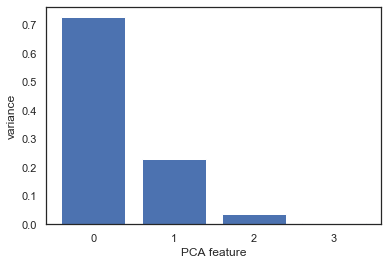

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler

stscaler = StandardScaler().fit(iris_data)
scaled= stscaler.transform(iris_data)

# Create a PCA instance: pca
pca = PCA().fit(scaled)



features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Based on the above visualization we can infer that we can consider the first 2 features as it explains more than 90% of the variance.

In [48]:
#transforming the data
reduced=pca.fit_transform(scaled)
reduced=reduced[:,[0,1]]
reduced[1]

array([-2.0864255 , -0.65540473])

##### Kmeans Clustering

In [49]:
##Standard imports just in case

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn.utils import check_random_state
from sklearn.cluster import KMeans
from sklearn.cluster import k_means_

from nose.tools import assert_equal, assert_is_instance, assert_true, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal

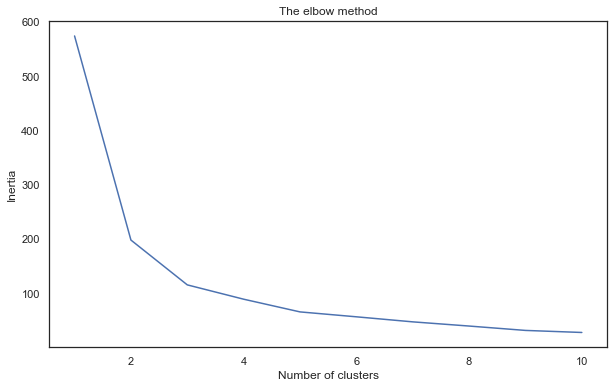

In [50]:
##Plotting inertia
inertia=[]
x_axis=range(1,11)

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = check_random_state(0))
    kmeans.fit(reduced)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('The elbow method')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of clusters')
plt.plot(x_axis, inertia)


In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(reduced)

In [52]:
y_clusters=kmeans.predict(reduced)

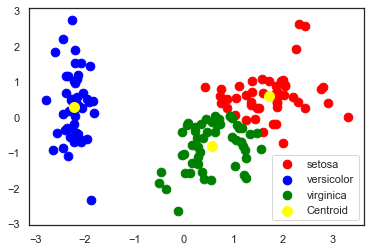

In [53]:
#Visualising the clusters
plt.scatter(reduced[y_kmeans == 0, 0], reduced[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = 'setosa')
plt.scatter(reduced[y_kmeans == 1, 0], reduced[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = 'versicolor')
plt.scatter(reduced[y_kmeans == 2, 0], reduced[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = 'virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroid')

plt.legend()

##### DbScan Clustering

In [54]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [55]:
neigh =NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(reduced)
distances, indices = nbrs.kneighbors(reduced)

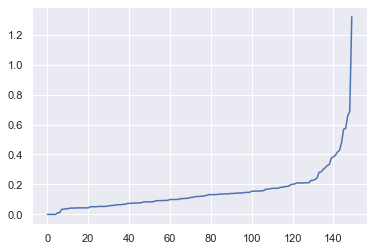

In [56]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [57]:
dbsc = DBSCAN(eps = 0.6, min_samples = 10).fit(reduced)
#Get the cluster labels
labels = dbsc.labels_
#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [58]:
np.unique(labels)

array([-1,  0,  1])

In [59]:
unique_labels = np.unique(labels)
colors = ["red", "yellow", "green"]

Text(0.5, 1.0, 'DBSCAN on Iris data')

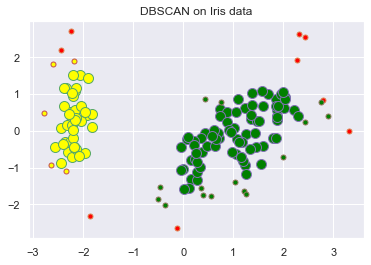

In [60]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = reduced[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = reduced[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on Iris data")

Results:
    1. K-means algorithm was able to identify the cluster correctly. Since the clustering is centroid based the algorithm was able to identify the clusters correctly based on the distance between the cluster centroids and the features. On the other hand,
    2. Dbscan has clustered the data into two clusters. This is due to the fact that the Dbscan clusters data based on the density of the data points. Since verginica and setosa data points are close to each other Dbscan assigned them to the same cluster rather than two different ones
    
Conclusion:   
    - K-means works better on spherical placed data and Dbscan works better on arbitrarily placed data sets

### Problem 3.2 Clustering on Reduced Delta data

In [61]:
reduced_delta = np.load('/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Assignments/Assignment_2/delta_reduced.npy')
#reduced_delta[1]

##### Dimension reduction using PCA

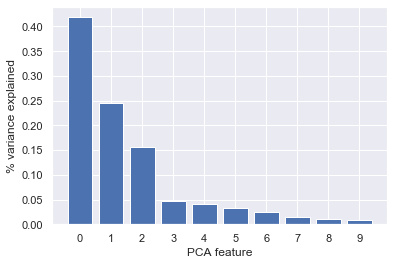

In [62]:
# Create a PCA instance: pca

stscaler = StandardScaler().fit(reduced_delta)
scaled= stscaler.transform(reduced_delta)

pca = PCA().fit(reduced_delta)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('% variance explained')
plt.xticks(features)
plt.show()

Based on the above plot reducing the number of features to 5 since they explain 85% of the variance

In [63]:
reduced_delta=pca.fit_transform(reduced_delta)
reduced_delta=reduced_delta[:,[0,1,2,3,4]]
reduced_delta[1]

array([-6.76662241, 16.74373407, -4.63409931,  0.08005199, -0.17356699])

##### Kmeans Clustering

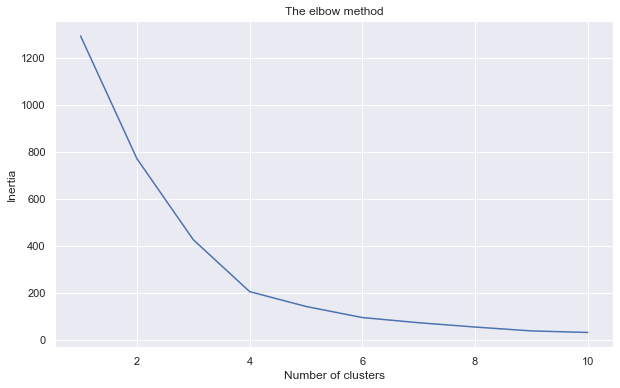

In [64]:
##Plotting inertia
inertia=[]
x_axis=range(1,11)

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = check_random_state(0))
    kmeans.fit(reduced_delta)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('The elbow method')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of clusters')
plt.plot(x_axis, inertia)


In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =4, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(reduced_delta)

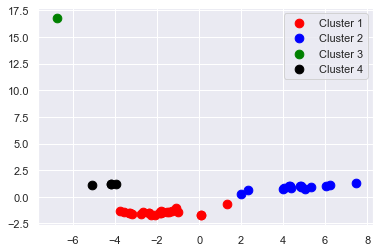

In [66]:
#Visualising the clusters
plt.scatter(reduced_delta[y_kmeans == 0, 0], reduced_delta[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = 'Cluster 1')
plt.scatter(reduced_delta[y_kmeans == 1, 0], reduced_delta[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = 'Cluster 2')
plt.scatter(reduced_delta[y_kmeans == 2, 0], reduced_delta[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = 'Cluster 3')
plt.scatter(reduced_delta[y_kmeans == 3, 0], reduced_delta[y_kmeans == 3, 1], s = 75, 
            c = 'black', label = 'Cluster 4')



plt.legend()

In [67]:
aircraft=['Airbus A319',
 'Airbus A319 VIP',
 'Airbus A320',
 'Airbus A320 32-R',
 'Airbus A330-200',
 'Airbus A330-200 (3L2)',
 'Airbus A330-200 (3L3)',
 'Airbus A330-300',
 'Boeing 717',
 'Boeing 737-700 (73W)',
 'Boeing 737-800 (738)',
 'Boeing 737-800 (73H)',
 'Boeing 737-900ER (739)',
 'Boeing 747-400 (74S)',
 'Boeing 757-200 (75A)',
 'Boeing 757-200 (75E)',
 'Boeing 757-200 (75M)',
 'Boeing 757-200 (75N)',
 'Boeing 757-200 (757)',
 'Boeing 757-200 (75V)',
 'Boeing 757-200 (75X)',
 'Boeing 757-300',
 'Boeing 767-300 (76G)',
 'Boeing 767-300 (76L)',
 'Boeing 767-300 (76P)',
 'Boeing 767-300 (76Q)',
 'Boeing 767-300 (76T)',
 'Boeing 767-300 (76U)',
 'Boeing 767-300 (76Z V.1)',
 'Boeing 767-300 (76Z V.2)',
 'Boeing 767-400 (76D)',
 'Boeing 777-200ER',
 'Boeing 777-200LR',
 'CRJ 100/200 Pinnacle/SkyWest',
 'CRJ 100/200 ExpressJet',
 'CRJ 700',
 'CRJ 900',
 'E120',
 'E170',
 'E175',
 'ERJ-145',
 'MD-88',
 'MD-90',
 'MD-DC9-50']

##### DbScan Clustering

In [68]:
neigh =NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(reduced_delta)
distances, indices = nbrs.kneighbors(reduced_delta)

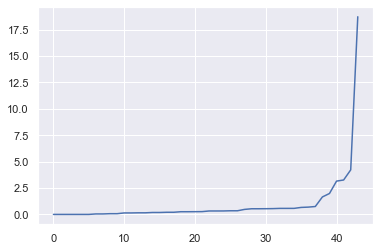

In [69]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [70]:
dbsc = DBSCAN(eps = 5, min_samples = 4).fit(reduced_delta)
#Get the cluster labels
labels = dbsc.labels_
#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [71]:
np.unique(labels)

array([-1,  0,  1])

In [72]:
unique_labels = np.unique(labels)
colors = ["red", "yellow", "green","navy","blue"]

Text(0.5, 1.0, 'DBSCAN on Reduced delta data')

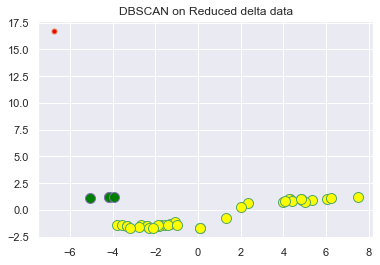

In [73]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = reduced_delta[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = reduced_delta[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on Reduced delta data")

In [74]:
#Clustering labels of DbScan Clustering
y_dbclusters=dbsc.fit_predict(reduced_delta)

##### tsne Reduction


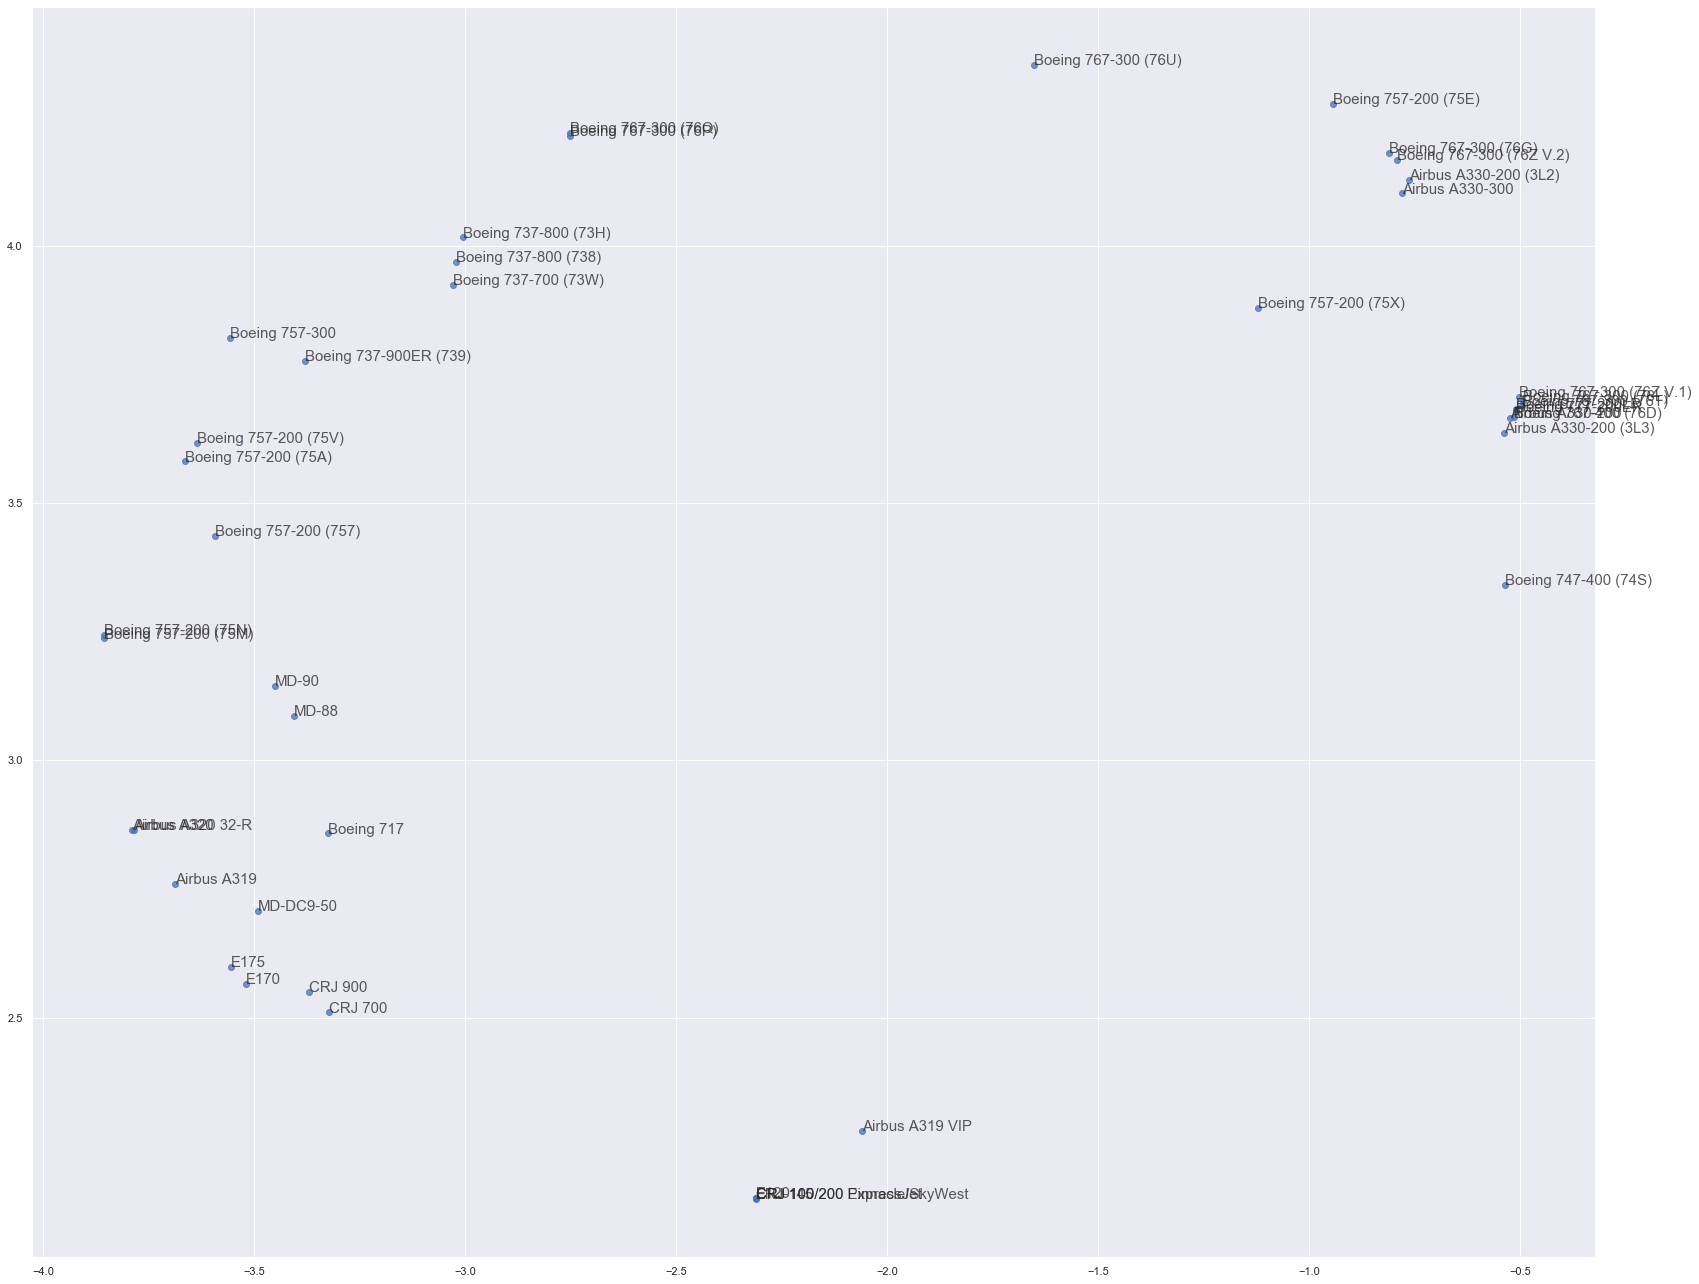

In [75]:
# Import normalize
from sklearn.preprocessing import normalize
#movements=pd.read_csv("movements.csv", header=None, index_col=False, skiprows=1, usecols=range(1,964))


# Normalize the movements: normalized_movements
normalized_movements = normalize(reduced_delta)

# Import TSNE
from sklearn.manifold import TSNE

plt.figure(figsize=(28,23))

# Create a TSNE instance: model
model = TSNE(learning_rate=100)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.75)
# Annotate the points
for x, y, aircrafts in zip(xs, ys, aircraft):
    plt.annotate(aircrafts, (x, y), fontsize=15, alpha=0.75)
plt.show()

###### Comparison of k-means and Dbscan clustering

In [76]:
df = pd.read_csv('/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Assignments/Assignment_2/delta.csv')
df['KmeansClusters'] = y_kmeans
df['DbscanClusters']=y_dbclusters
df['Aircraft']=Aircraft
df_kmeansgrouped = df.groupby('KmeansClusters').mean()
df_dbscangrouped = df.groupby('DbscanClusters').mean()
print(df_kmeansgrouped.Accommodation,df_dbscangrouped.Accommodation )


KmeansClusters
0    153.625000
1    244.733333
2     54.000000
3     44.500000
Name: Accommodation, dtype: float64 DbscanClusters
-1     54.000000
 0    188.666667
 1     44.500000
Name: Accommodation, dtype: float64


In [77]:
clust1 = df[df.KmeansClusters == 0]
clust2 = df[df.KmeansClusters == 1]
clust3 = df[df.KmeansClusters == 2]
clust4 = df[df.KmeansClusters == 3]

print(clust1.Aircraft)
print(clust2.Aircraft)
print(clust3.Aircraft)
print(clust4.Aircraft)

0                Airbus A319
2                Airbus A320
3           Airbus A320 32-R
8                 Boeing 717
9       Boeing 737-700 (73W)
10      Boeing 737-800 (738)
11      Boeing 737-800 (73H)
12    Boeing 737-900ER (739)
14      Boeing 757-200 (75A)
16      Boeing 757-200 (75M)
17      Boeing 757-200 (75N)
18      Boeing 757-200 (757)
19      Boeing 757-200 (75V)
21            Boeing 757-300
24      Boeing 767-300 (76P)
25      Boeing 767-300 (76Q)
27      Boeing 767-300 (76U)
35                   CRJ 700
36                   CRJ 900
38                      E170
39                      E175
41                     MD-88
42                     MD-90
43                 MD-DC9-50
Name: Aircraft, dtype: object
4              Airbus A330-200
5        Airbus A330-200 (3L2)
6        Airbus A330-200 (3L3)
7              Airbus A330-300
13        Boeing 747-400 (74S)
15        Boeing 757-200 (75E)
20        Boeing 757-200 (75X)
22        Boeing 767-300 (76G)
23        Boeing 767-300 (

Results :  
    1. K-means algorithm was able to identify the clusters correctly. This can be supported by looking at the tsne plot. The tsne reduction has clustered the data into four clusters and the k-means algorithm also clustered the data into similar clusters as visualized by the tsne. On the other hand,
    2. Dbscan clustered the data into three clusters. Based on the cluster means we can say that two clusters are similar to the clusters produced by k-means clustering (Refer to the cells above). Since the data points are clustered on the density data points that are placed near to each other are considered to be part of one cluster.
    
Conclusion:
    - K-means is a better clustering algorithm compared to Dbscan clustering algorithm for clustering delta data

###  Problem 3.3 Clustering on movements data using DbScan and K-means

In [78]:
movements=pd.read_csv("/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Week-3/Data/movements.csv", header=None, index_col=False, skiprows=1, usecols=range(1,964))
movements=movements.values


In [79]:
companies=['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

#### Dimension reduction using PCA

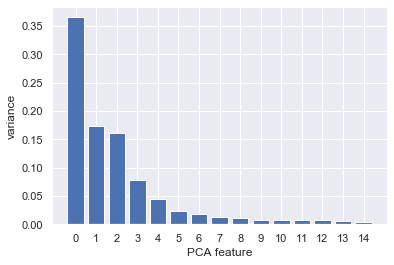

In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler

stscaler = StandardScaler().fit(movements)
scaled= stscaler.transform(movements)

# Create a PCA instance: pca
pca = PCA(n_components=15).fit(scaled)


features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [81]:
scaled

array([[ 0.4496197 , -0.38038084, -1.30603921, ..., -2.51168159,
         0.61220263, -5.74259972],
       [-1.36172667, -0.92679173,  0.04971049, ...,  0.02078649,
        -0.74336873,  0.11144388],
       [-3.90058279,  1.50032885, -0.85695009, ...,  2.32002256,
        -2.23010689,  1.00184359],
       ...,
       [ 0.22691503,  0.19145242,  0.38017522, ..., -0.08394087,
         0.1311819 ,  0.05940875],
       [-0.27788708, -0.0881048 ,  0.1047883 , ...,  0.02554728,
        -0.28422918, -0.08802742],
       [-0.17395902, -0.08810353,  0.13868208, ...,  0.01126587,
        -0.02186716, -0.05044645]])

In [82]:
#transforming the data
#scaled=scaled[[0,1,2,3,4,5]]
reduced=pca.fit_transform(scaled)
reduced=reduced[:,[0,1,2,3,4,5]]

###### K-Means Clustering

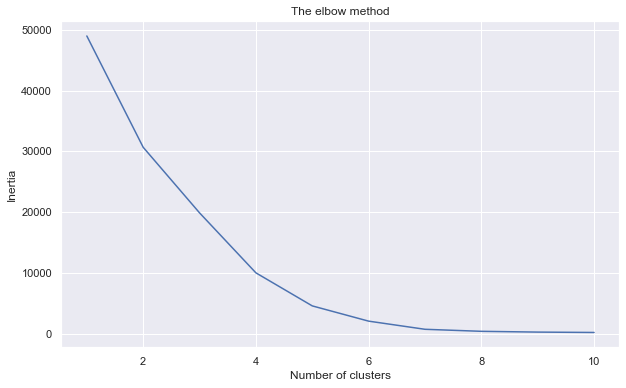

In [83]:
##Plotting inertia
inertia=[]
x_axis=range(1,11)

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = check_random_state(0))
    kmeans.fit(reduced)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('The elbow method')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of clusters')
plt.plot(x_axis, inertia)


In [84]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(reduced)

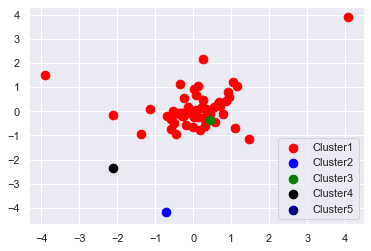

In [85]:
#Visualising the clusters
plt.scatter(scaled[y_kmeans == 0, 0], scaled[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = 'Cluster1')
plt.scatter(scaled[y_kmeans == 1, 0], scaled[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = 'Cluster2')
plt.scatter(scaled[y_kmeans == 2, 0], scaled[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = 'Cluster3')
plt.scatter(scaled[y_kmeans == 3, 0], scaled[y_kmeans == 3, 1], s = 75, 
            c = 'black', label = 'Cluster4')
plt.scatter(scaled[y_kmeans == 4, 0], scaled[y_kmeans == 4, 1], s = 75, 
            c = 'navy', label = 'Cluster5')

plt.legend()

##### DbScan Clustering

In [86]:
neigh =NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled)
distances, indices = nbrs.kneighbors(scaled)

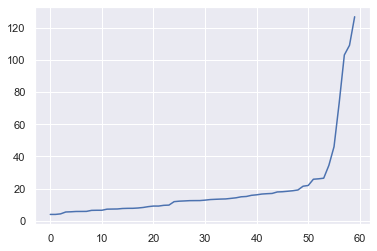

In [87]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [88]:
dbsc = DBSCAN(eps = 25, min_samples = 2).fit(scaled)
#Get the cluster labels
labels = dbsc.labels_
#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [89]:
np.unique(labels)

array([-1,  0])

In [90]:
unique_labels = np.unique(labels)
colors = ["red", "yellow", "green"]

Text(0.5, 1.0, 'DBSCAN on movements data')

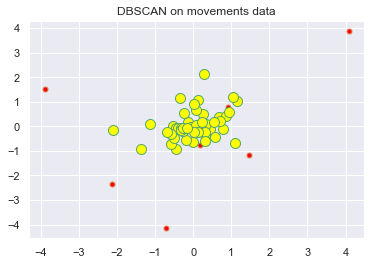

In [91]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = scaled[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = scaled[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on movements data")

In [92]:
#Clustering labels of DbScan Clustering
y_dbclusters=dbsc.fit_predict(scaled)

##### Hirerarchical Clustering

In [93]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')  
hirearchical_clusters=cluster.fit_predict(scaled)  

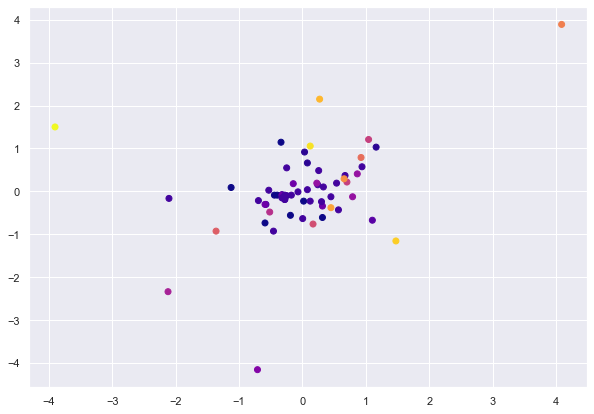

In [94]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaled[:,0], scaled[:,1], c=cluster.labels_, cmap='plasma')  

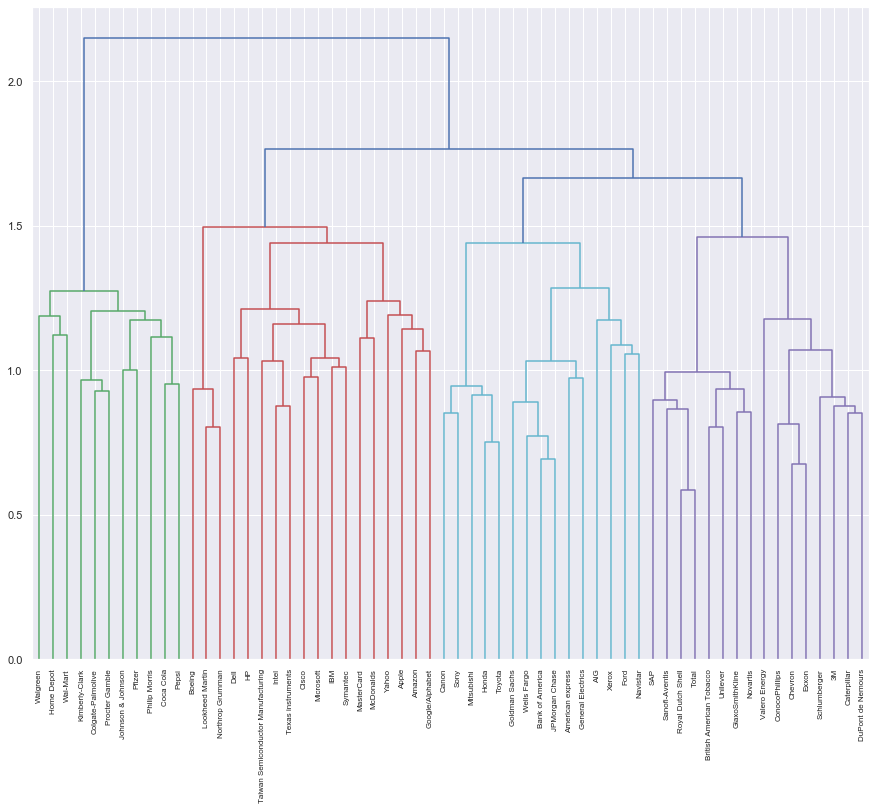

In [95]:
movements=pd.read_csv("/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Week-3/Data/movements.csv", header=None, index_col=False, skiprows=1, usecols=range(1,964))

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

movementss=movements.values
normalized_movements = normalize(movementss)

plt.figure(figsize=(15,12))

mergings = linkage(normalized_movements, method='ward')

dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90.,
    leaf_font_size=8
)

plt.show()


###### Comparison of k-means, DbScan and Hierarchical clustering results

In [96]:
df=pd.read_csv("/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Week-3/Data/movements.csv", header=None, index_col=False, skiprows=1, usecols=range(1,964))
df['KmeansClusters'] = y_kmeans
#df['DbscanClusters']=y_dbclusters
df['HireClusters'] = hirearchical_clusters
df['companies']= companies
#df = df.set_index('companies', inplace=True)
df_kmeansgrouped = df.groupby('KmeansClusters').mean()
#df_dbscangrouped = df.groupby('DbscanClusters').mean()


kclust1 = df[df.KmeansClusters == 0]
kclust2 = df[df.KmeansClusters == 1]
kclust3 = df[df.KmeansClusters == 2]
kclust4 = df[df.KmeansClusters == 3]
kclust5 = df[df.KmeansClusters == 4]


clust1 = df[df.HireClusters == 0]
clust2 = df[df.HireClusters == 1]
clust3 = df[df.HireClusters == 2]
clust4 = df[df.HireClusters == 3]
clust5 = df[df.HireClusters == 4]
clust6 = df[df.HireClusters == 5]
clust7 = df[df.HireClusters == 6]
clust8 = df[df.HireClusters == 7]
clust9 = df[df.HireClusters == 8]
clust10 = df[df.HireClusters == 9]
clust11 = df[df.HireClusters == 10]
clust12 = df[df.HireClusters == 11]
clust13 = df[df.HireClusters == 12]
clust14 = df[df.HireClusters == 13]

print('---------Kmeans Clusters--------')

print(kclust1.companies)
print(kclust2.companies)
print(kclust3.companies)
print(kclust4.companies)
print(kclust5.companies)

print('------------------------')
print('-------Hierarchical Clusters-------')

print(clust1.companies)
print(clust2.companies)
print(clust3.companies)
print(clust4.companies)
print(clust5.companies)
print(clust6.companies)
print(clust7.companies)
print(clust8.companies)
print(clust9.companies)
print(clust10.companies)
print(clust11.companies)
print(clust12.companies)
print(clust13.companies)


---------Kmeans Clusters--------
1                                    AIG
2                                 Amazon
3                       American express
4                                 Boeing
5                        Bank of America
6               British American Tobacco
7                                  Canon
8                            Caterpillar
9                      Colgate-Palmolive
10                        ConocoPhillips
11                                 Cisco
12                               Chevron
13                     DuPont de Nemours
14                                  Dell
15                                  Ford
16                     General Electrics
18                         Goldman Sachs
19                       GlaxoSmithKline
20                            Home Depot
21                                 Honda
22                                    HP
23                                   IBM
24                                 Intel
25                     J

Results:
   1. Based on the inertia plot we can see that 4 is the optimum number of clusters. However, when we look at the profile of the companies among the clusters we see that companies like Amazon, Boeing and Caterpillar being clustered together. This isn't the right segmentation of the clusters.
   2. Dbscan clusters the data into a single large cluster and the noise as the outliers. It isn't the ideal clustering algorithm to segment the movements data
   3. In hierarchical clustering, the cluster segregation gets better as we increase the number of clusters. The optimum clusters can be decided based on looking at the dendrogram of the hierarchical clustering. I've taken 20 as the number of clusters and we can see the segmentation of the companies is similar to the ones clustered as seen in the tsne reduction plot
   
Conclusion: Hierarchical clustering is the best clustering algorithm to cluster the movements data

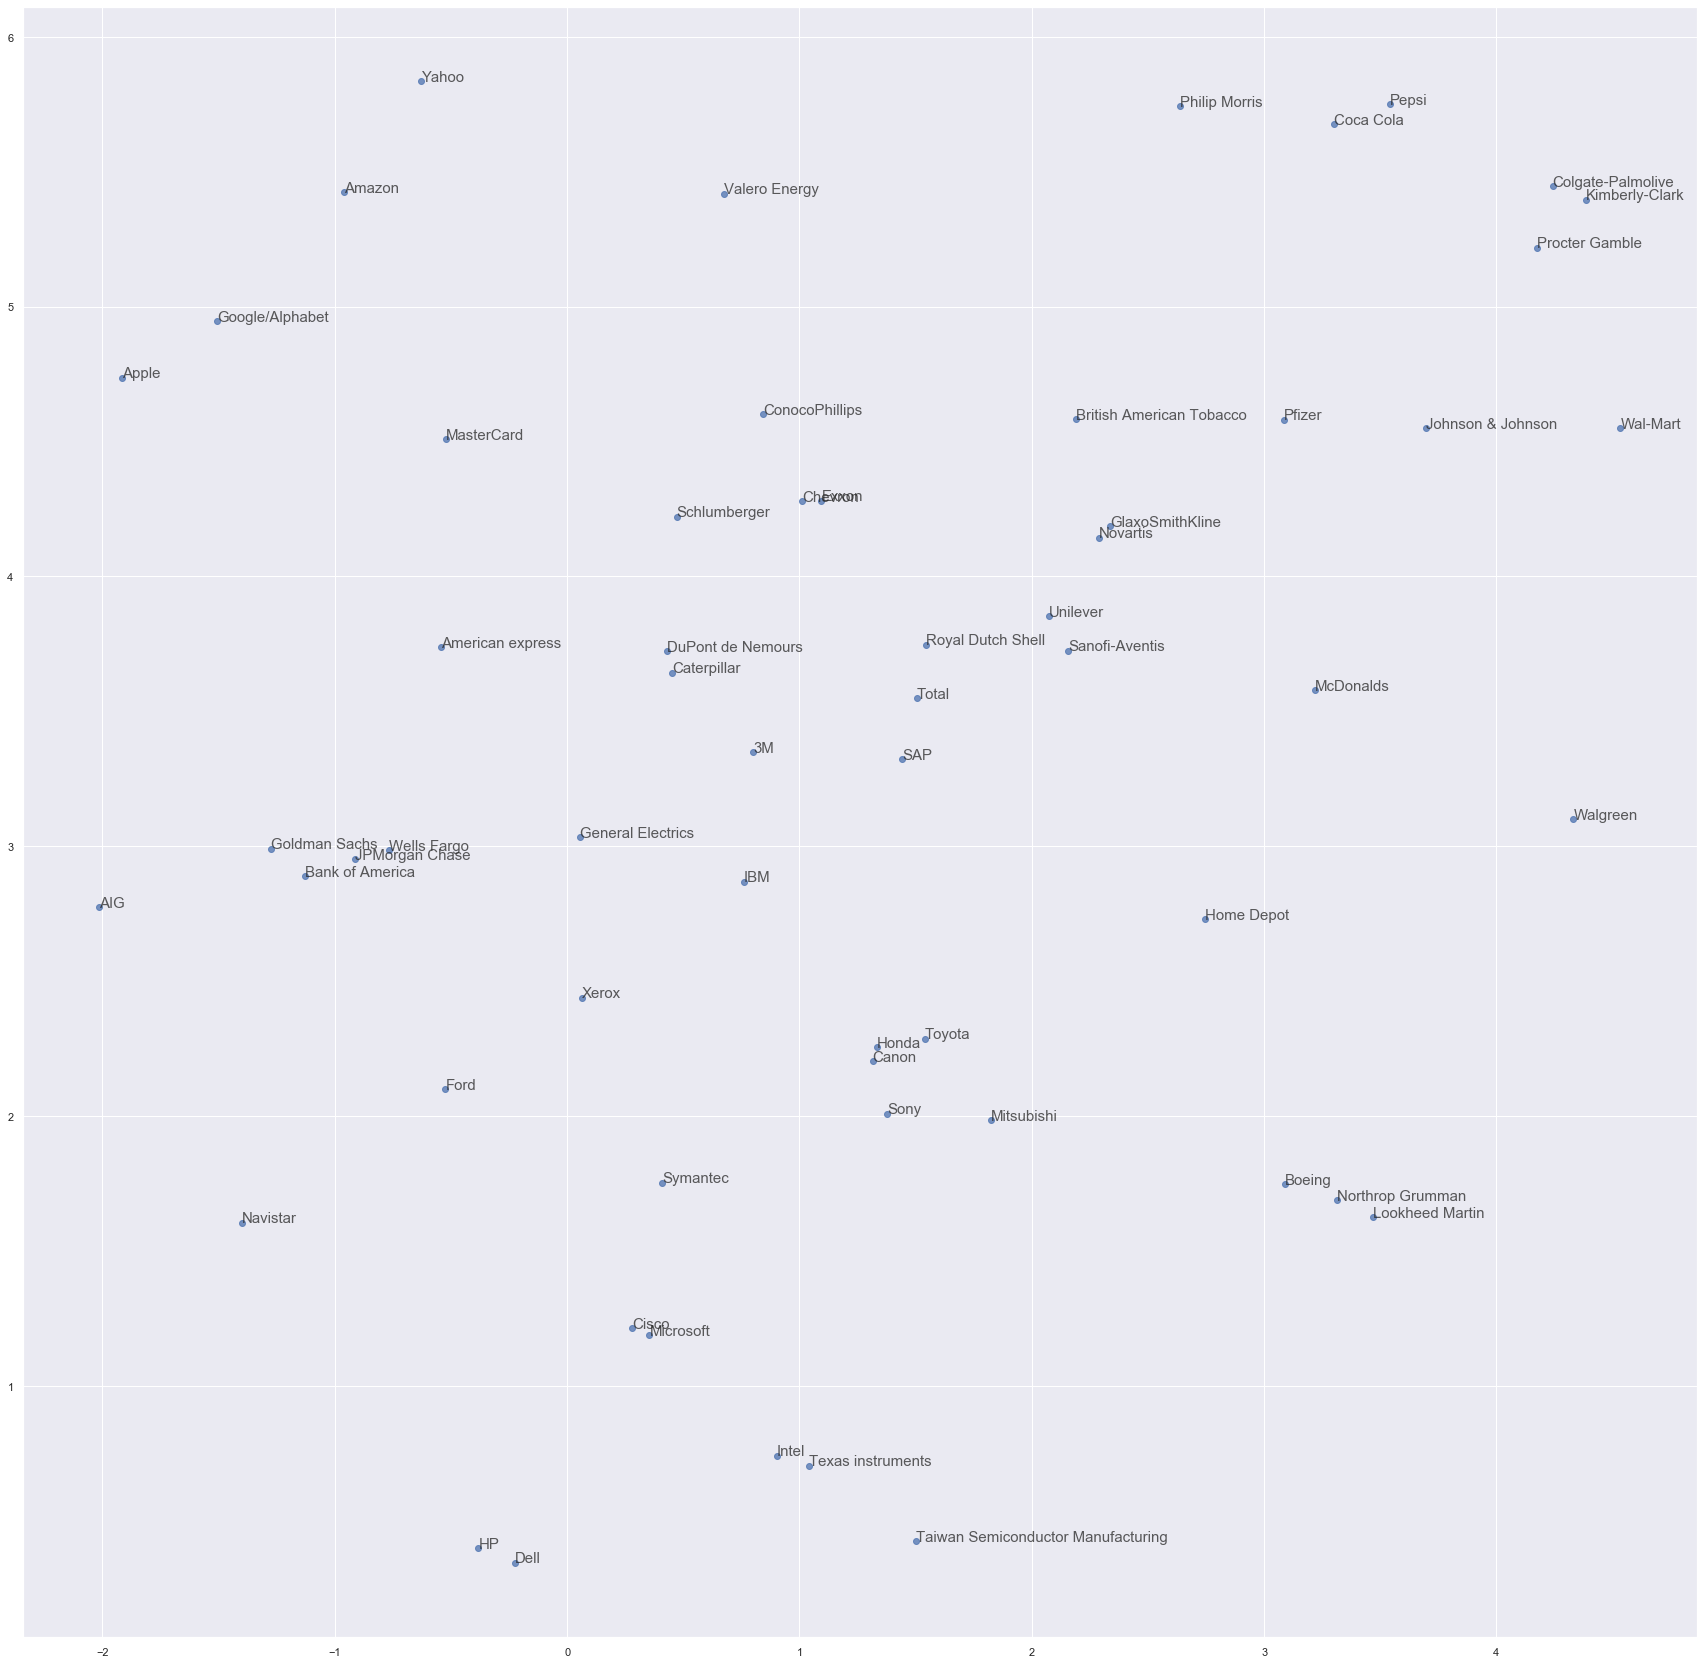

In [97]:
# Import normalize
from sklearn.preprocessing import normalize
#movements=pd.read_csv("movements.csv", header=None, index_col=False, skiprows=1, usecols=range(1,964))


# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Import TSNE
from sklearn.manifold import TSNE

plt.figure(figsize=(30,30))

# Create a TSNE instance: model
model = TSNE(learning_rate=100)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.75)
# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=15, alpha=0.75)
plt.show()

### Problem 4

Apply t-SNE reduction to delta.csv file and compare/discuss the results with PCA. Please submit your code and output, and write down 3-4 sentences that you observed from the results.

In [98]:
df = pd.read_csv('/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Assignments/Assignment_2/delta.csv', index_col=False)
df=df.drop(["Aircraft"],axis=1)
df.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
1,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,1,0,0,0,0,1,1,1,0,0
2,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
3,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
4,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,1,1,0,1,0,0,0,1,1,1


In [99]:
aircraft=['Airbus A319',
 'Airbus A319 VIP',
 'Airbus A320',
 'Airbus A320 32-R',
 'Airbus A330-200',
 'Airbus A330-200 (3L2)',
 'Airbus A330-200 (3L3)',
 'Airbus A330-300',
 'Boeing 717',
 'Boeing 737-700 (73W)',
 'Boeing 737-800 (738)',
 'Boeing 737-800 (73H)',
 'Boeing 737-900ER (739)',
 'Boeing 747-400 (74S)',
 'Boeing 757-200 (75A)',
 'Boeing 757-200 (75E)',
 'Boeing 757-200 (75M)',
 'Boeing 757-200 (75N)',
 'Boeing 757-200 (757)',
 'Boeing 757-200 (75V)',
 'Boeing 757-200 (75X)',
 'Boeing 757-300',
 'Boeing 767-300 (76G)',
 'Boeing 767-300 (76L)',
 'Boeing 767-300 (76P)',
 'Boeing 767-300 (76Q)',
 'Boeing 767-300 (76T)',
 'Boeing 767-300 (76U)',
 'Boeing 767-300 (76Z V.1)',
 'Boeing 767-300 (76Z V.2)',
 'Boeing 767-400 (76D)',
 'Boeing 777-200ER',
 'Boeing 777-200LR',
 'CRJ 100/200 Pinnacle/SkyWest',
 'CRJ 100/200 ExpressJet',
 'CRJ 700',
 'CRJ 900',
 'E120',
 'E170',
 'E175',
 'ERJ-145',
 'MD-88',
 'MD-90',
 'MD-DC9-50']

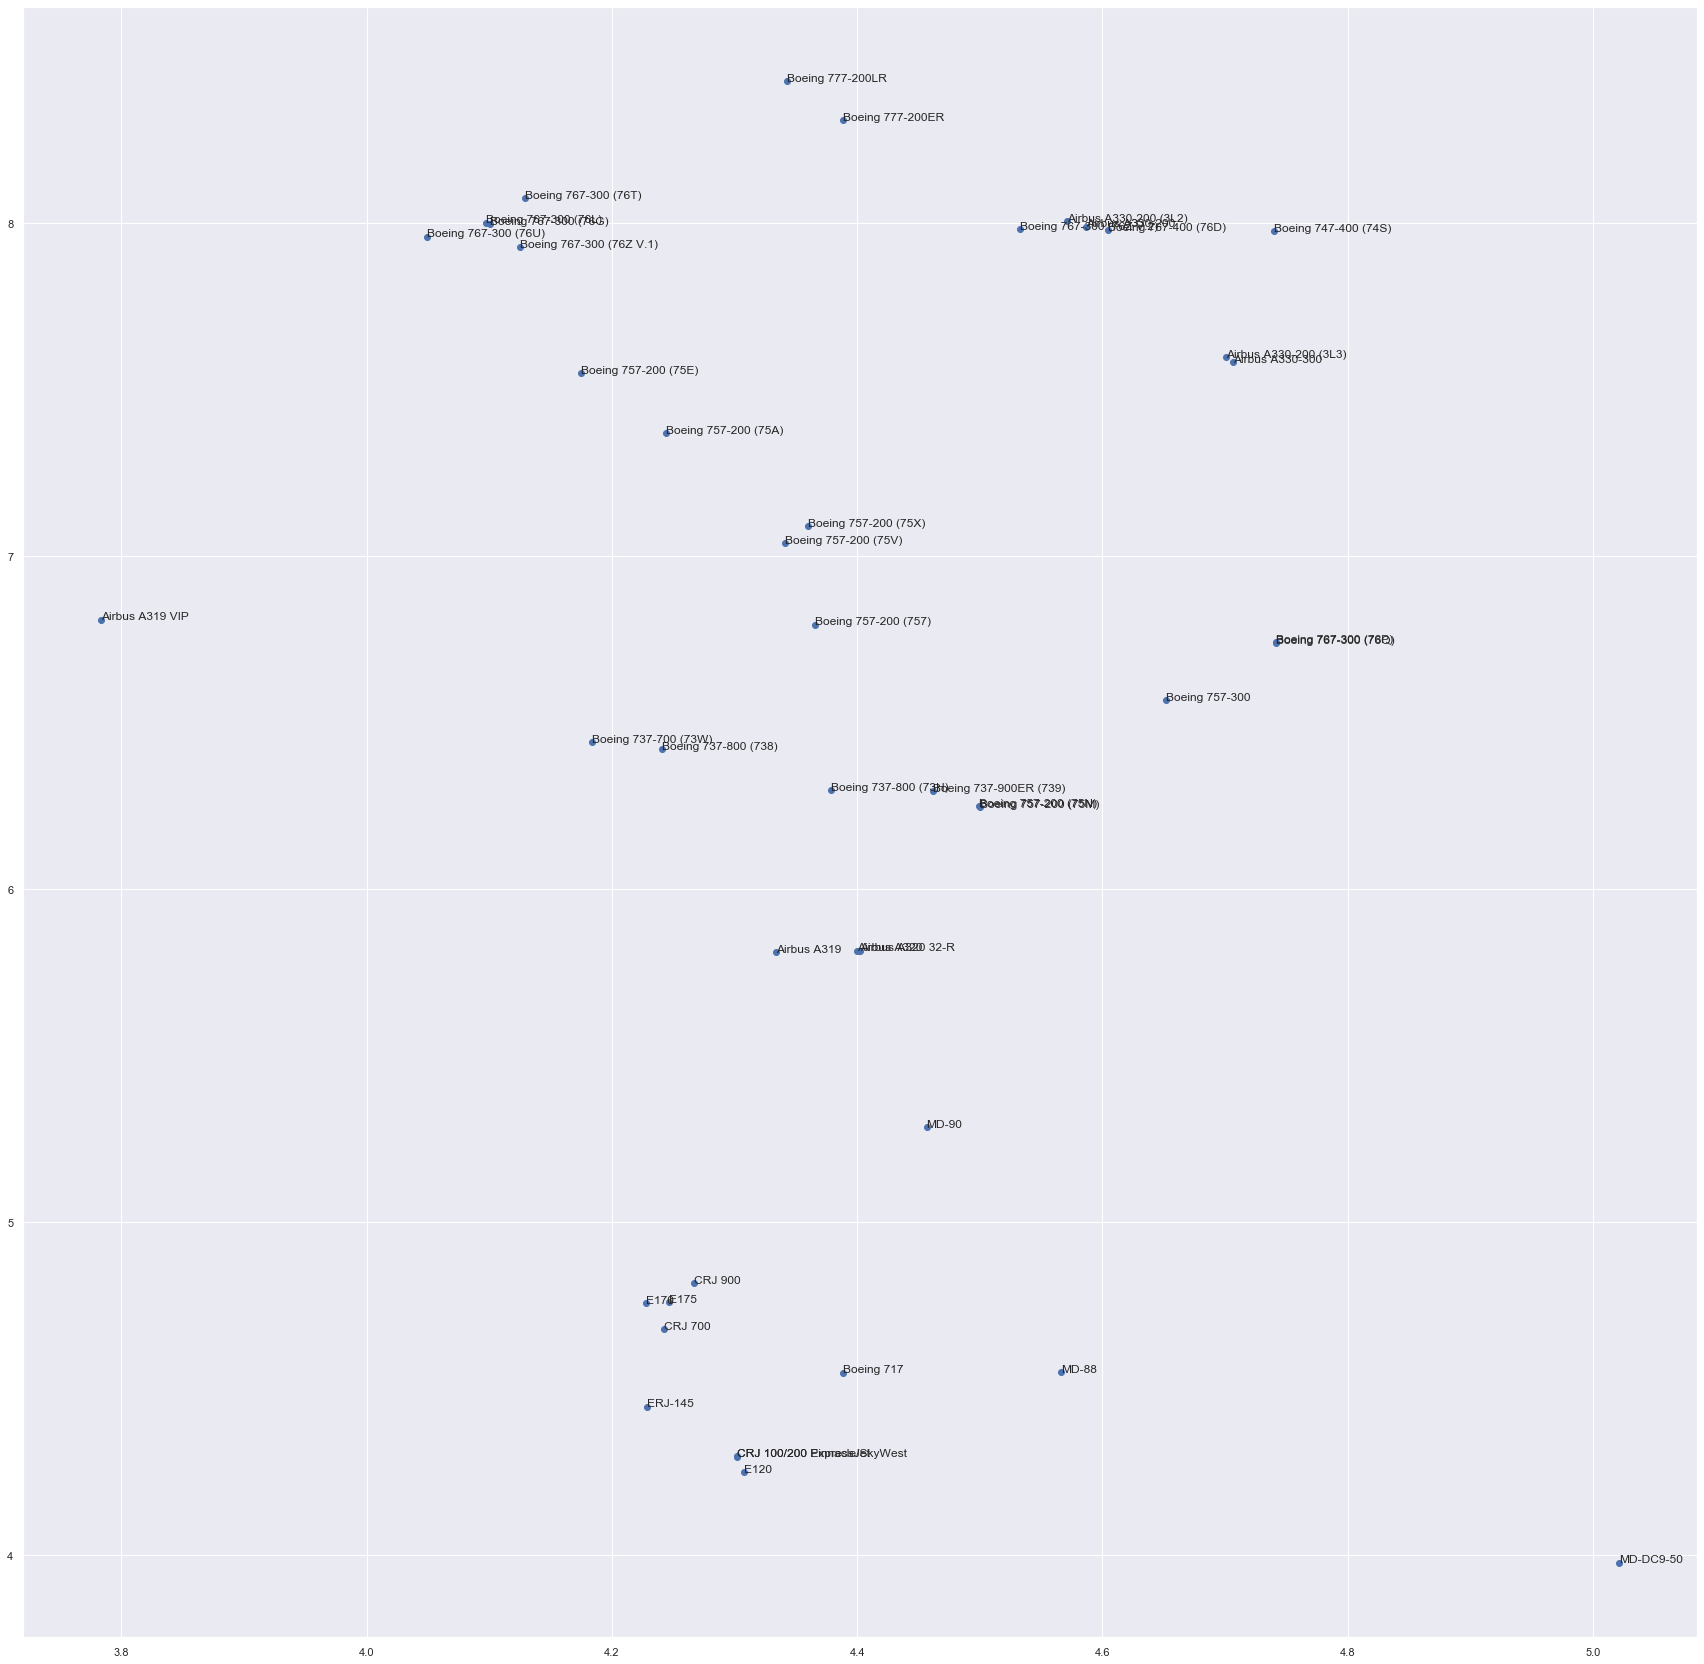

In [100]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(df)

# Import TSNE
from sklearn.manifold import TSNE

plt.figure(figsize=(30,30))

# Create a TSNE instance: model
model = TSNE(learning_rate=100)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=1)
# Annotate the points
for x, y, aircrafts in zip(xs, ys, aircraft):
    plt.annotate(aircrafts, (x, y), fontsize=12, alpha=1)
plt.show()

##### Using PCA

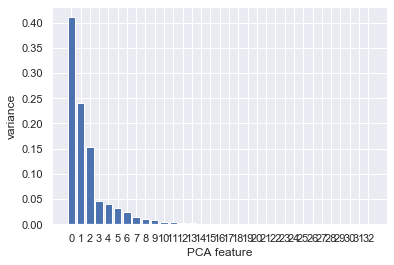

In [101]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler

stscaler = StandardScaler().fit(df)
scaled= stscaler.transform(df)

# Create a PCA instance: pca
pca = PCA().fit(scaled)



features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [102]:
#transforming the data
reduced=pca.fit_transform(scaled)
reduced=reduced[:,[0,1,2,3,4]]
reduced[1]

array([-6.76662241, 16.74373407, -4.63409931,  0.08005199, -0.17356699])

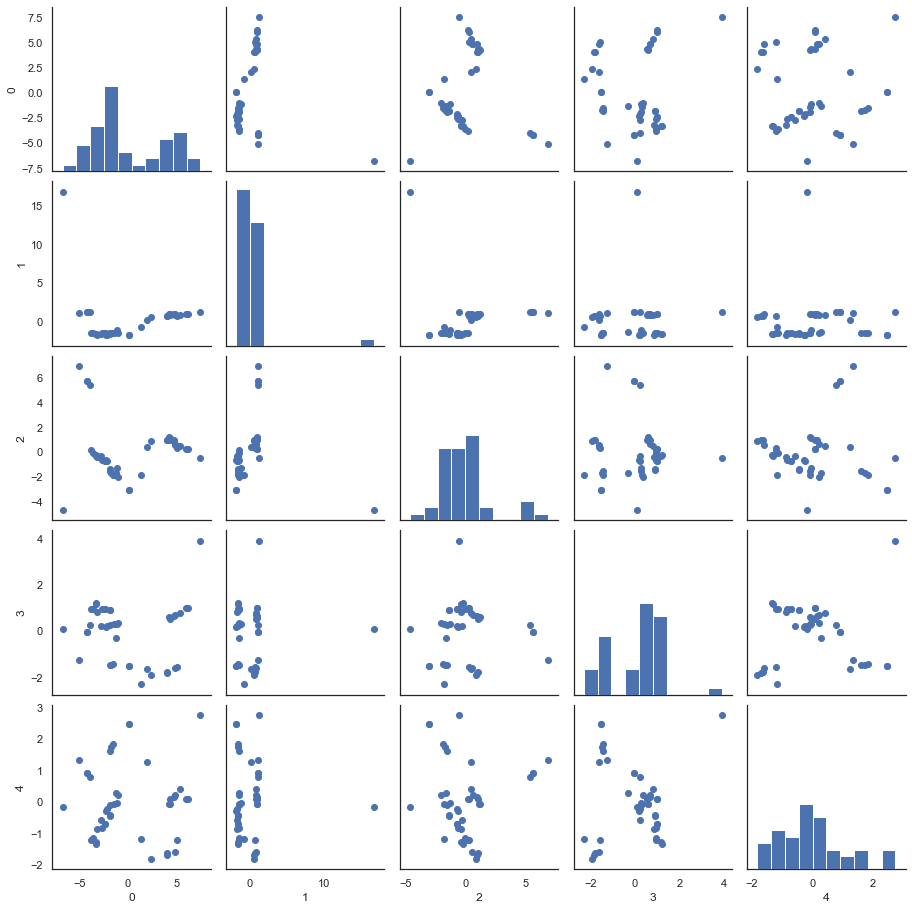

In [103]:
reduced=pd.DataFrame(reduced)

c=[0,1,2,3,4]
sns.set(style="white",color_codes=True,palette='deep')

# Make pair plot
g = sns.PairGrid(reduced)
g = g.map_offdiag(plt.scatter)
ax = g.map_diag(plt.hist)

Results:
    1. The tsne reduction plot and PCA pair grid plot clusters the data in a very similar sense. Based on the above visualization we can see that the data is clustered into 4-5 clusters.

### Problem 5 (Bonus)

Apply Hiearchical Clustering to delta.csv and observe how physical features are being clustered in ealry leaves at the bottom. Please submit your code and dendrogram graph along with 1-2 sentences interpretation.

In [104]:
df = pd.read_csv('/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Assignments/Assignment_2/delta.csv', index_col=False)
df=df.drop(["Aircraft"],axis=1)
df.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
1,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,1,0,0,0,0,1,1,1,0,0
2,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
3,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
4,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,1,1,0,1,0,0,0,1,1,1


In [105]:
aircraft=['Airbus A319',
 'Airbus A319 VIP',
 'Airbus A320',
 'Airbus A320 32-R',
 'Airbus A330-200',
 'Airbus A330-200 (3L2)',
 'Airbus A330-200 (3L3)',
 'Airbus A330-300',
 'Boeing 717',
 'Boeing 737-700 (73W)',
 'Boeing 737-800 (738)',
 'Boeing 737-800 (73H)',
 'Boeing 737-900ER (739)',
 'Boeing 747-400 (74S)',
 'Boeing 757-200 (75A)',
 'Boeing 757-200 (75E)',
 'Boeing 757-200 (75M)',
 'Boeing 757-200 (75N)',
 'Boeing 757-200 (757)',
 'Boeing 757-200 (75V)',
 'Boeing 757-200 (75X)',
 'Boeing 757-300',
 'Boeing 767-300 (76G)',
 'Boeing 767-300 (76L)',
 'Boeing 767-300 (76P)',
 'Boeing 767-300 (76Q)',
 'Boeing 767-300 (76T)',
 'Boeing 767-300 (76U)',
 'Boeing 767-300 (76Z V.1)',
 'Boeing 767-300 (76Z V.2)',
 'Boeing 767-400 (76D)',
 'Boeing 777-200ER',
 'Boeing 777-200LR',
 'CRJ 100/200 Pinnacle/SkyWest',
 'CRJ 100/200 ExpressJet',
 'CRJ 700',
 'CRJ 900',
 'E120',
 'E170',
 'E175',
 'ERJ-145',
 'MD-88',
 'MD-90',
 'MD-DC9-50']

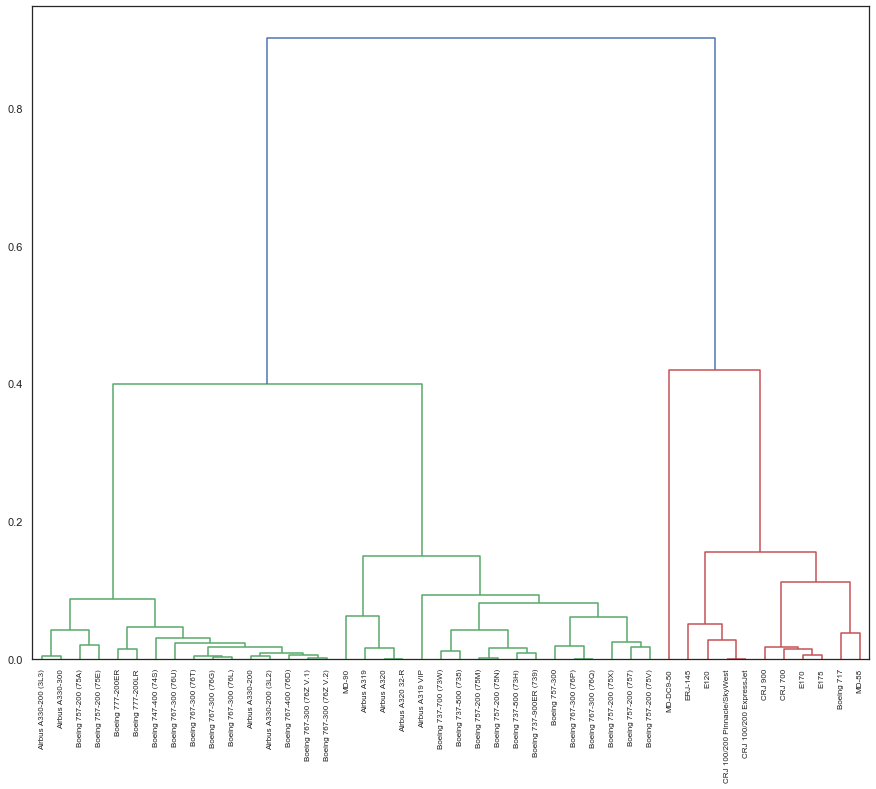

In [106]:
# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

movementss=df.values
normalized_movements = normalize(movementss)
plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='ward')
# Plot the dendrogram
dendrogram(
    mergings,
    labels=aircraft,
    leaf_rotation=90.,
    leaf_font_size=8
)


#"Your code here"
plt.show()


In [107]:
df = pd.read_csv('/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Data Mining Principles/Assignments/Assignment_2/delta.csv', index_col=False)
df['Aircraft']=Aircraft

aircrafts=['Airbus A330-200 (3L3)','Airbus A330-300','Boeing 757-200 (75A)','Boeing 757-200 (75E)']
filtered_data=df[df.Aircraft.isin(aircrafts)]
filtered_data

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
6,Airbus A330-200 (3L3),0.0,0,0,0.0,0.0,0,21.0,80.0,34,...,1,1,0,1,0,0,0,1,1,1
7,Airbus A330-300,0.0,0,0,0.0,0.0,0,20.0,60.0,34,...,1,1,0,0,1,0,0,1,1,1
14,Boeing 757-200 (75A),0.0,0,0,21.0,40.0,24,0.0,0.0,0,...,1,0,0,0,0,0,1,0,1,1
15,Boeing 757-200 (75E),0.0,0,0,0.0,0.0,0,21.0,54.5,16,...,1,1,0,0,1,0,0,1,1,1


Results:
    1. Based on the above dendogram we can observe that the aircrafts belonging to the Airbus and in particular to A330 model have been clustered together. And the aircrafts with 757-200 make belonging to Boeing have been clustered together.
    2. One of the many differentiating factors between Airbus A330-200(3L3) and Airbus A330-300 may have been due  to Flat-bed and Sleeper seating features. A330-200 has Falt-bed and A330-300 has a Sleeper feature
    3. For Boeing 757-200(75A) and Boeing 757-200(75E) one of the differentiating factors can be distinction between First class and Business class seats. 75A has First class seats and 75E has business cllass seats.